In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
all_info = pd.read_excel('../data/allyears_pop.xlsx')

In [3]:
all_info.head(1)

,year,facility_id,facility_name,county,facility_group,facility_class,total_patients,totalervisits,totaloutpatientvisits,totalinpatientdays,total_expenses,net_profit_loss,total_uninsured_patients,profit_margin,uninsured_rate,charges_per_patient,er_share,inpatient_days_per_patient
0,2021,179,Methodist Medical Center of Oak Ridge,Anderson,NonGovermental Not-For-Profit,Other Nonprofit Corp,8637,0,129415,44835,0,0,0,0.0,0.0,0.0,0.0,5.19


In [4]:
df_all_years = pd.read_excel('../data/df_all_years.xlsx')

In [6]:
df_all_years.columns

Index(['year', 'facility_id', 'facility_name', 'county', 'address', 'city',
       'zip_code', 'facility_group', 'facility_class',
       'medicare_as_primary_num_of_claims', 'comm_bcbs_as_payer_num_of_claims',
       'other_payer_as_primary_num_of_claims',
       'medicare_claims_inpatient_total_charges',
       'medicare_claims_outpatient_total_charges',
       'medicare_claims_inpatient_total_payment',
       'medicare_claims_outpatient_total_payment',
       'comm_blue_cross_blue_shield_inpatient_total_charges',
       'comm_blue_cross_blue_shield_outpatient_total_charges',
       'comm_blue_cross_blue_shield_inpatient_total_payment',
       'comm_blue_cross_blue_shield_outpatient_total_payment',
       'other_payer_claims_inpatient_total_charges',
       'other_payer_claims_outpatient_total_charges',
       'other_payer_claims_inpatient_total_payment',
       'other_payer_claims_outpatient_total_payment', 'total_uninsured',
       'uninsured_inpatient_charges', 'uninsured_outpatie

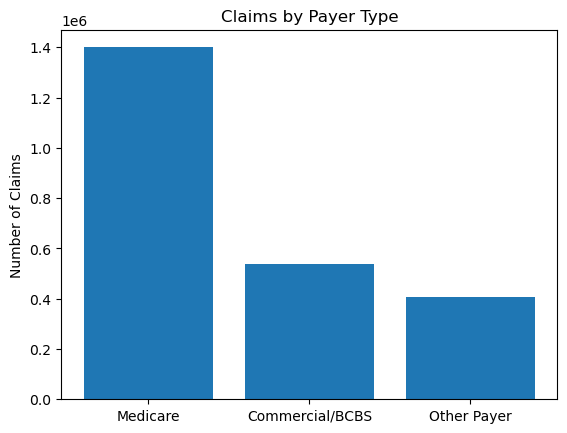

In [9]:
# 1. Claims by Payer Type
claims = {
    "Medicare": df_all_years["medicare_as_primary_num_of_claims"].sum(),
    "Commercial/BCBS": df_all_years["comm_bcbs_as_payer_num_of_claims"].sum(),
    "Other Payer": df_all_years["other_payer_as_primary_num_of_claims"].sum()
}

plt.bar(claims.keys(), claims.values())
plt.title("Claims by Payer Type")
plt.ylabel("Number of Claims")
plt.show()

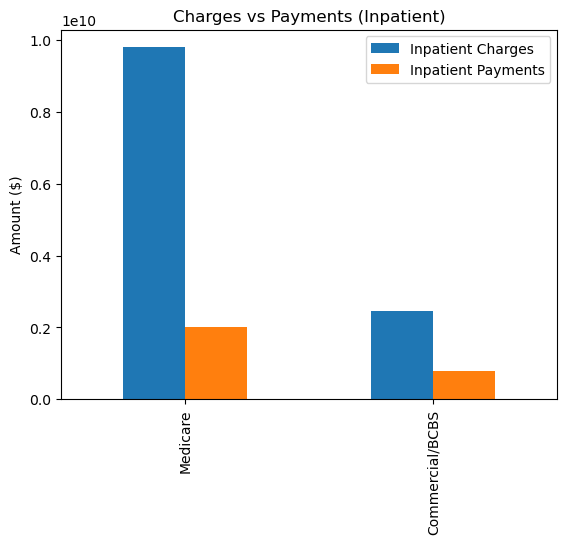

In [12]:
# 2. Charges vs Payments by Payer
charges_payments = pd.DataFrame({
    "Inpatient Charges": [df_all_years["medicare_claims_inpatient_total_charges"].sum(),
                          df_all_years["comm_blue_cross_blue_shield_inpatient_total_charges"].sum()],
    "Inpatient Payments": [df_all_years["medicare_claims_inpatient_total_payment"].sum(),
                           df_all_years["comm_blue_cross_blue_shield_inpatient_total_payment"].sum()]
}, index=["Medicare", "Commercial/BCBS"])

charges_payments.plot(kind="bar")
plt.title("Charges vs Payments (Inpatient)")
plt.ylabel("Amount ($)")
plt.show()

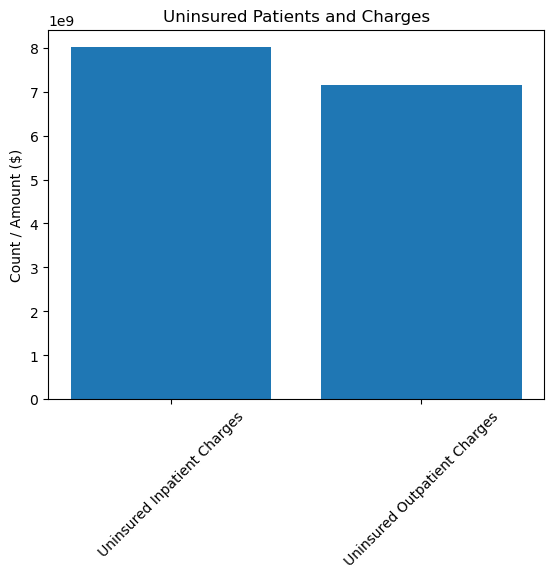

In [15]:
# 3. Uninsured Impact
uninsured = {
    "Uninsured Inpatient Charges": df_all_years["uninsured_inpatient_charges"].sum(),
    "Uninsured Outpatient Charges": df_all_years["uninsured_outpatient_charges"].sum()
}

plt.bar(uninsured.keys(), uninsured.values())
plt.title("Uninsured Patients and Charges")
plt.ylabel("Count / Amount ($)")
plt.xticks(rotation=45)
plt.show()

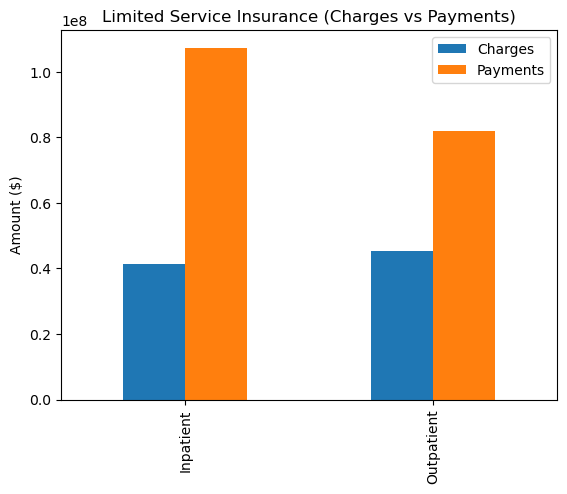

In [16]:
# 4. Limited Service Insurance
limited_service = pd.DataFrame({
    "Charges": [df_all_years["inpatient_charges_with_limited_service_insurance"].sum(),
                df_all_years["outpatient_charges_with_limited_service_insurance"].sum()],
    "Payments": [df_all_years["inpatient_total_payment_with_limited_service_insurance"].sum(),
                 df_all_years["outpatient_total_payment_with_limited_service_insurance"].sum()]
}, index=["Inpatient", "Outpatient"])

limited_service.plot(kind="bar")
plt.title("Limited Service Insurance (Charges vs Payments)")
plt.ylabel("Amount ($)")
plt.show()


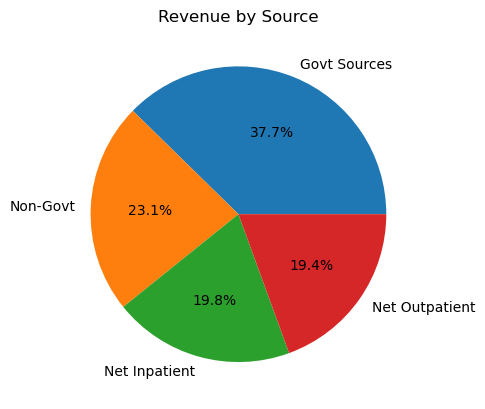

In [17]:
# 5. Revenue by Source
revenue = {
    "Govt Sources": df_all_years["total_govt_sources_net_patient_revenue"].sum(),
    "Non-Govt": df_all_years["total_non-govt_net_patient_revenue"].sum(),
    "Net Inpatient": df_all_years["total_net_inpatient_revenue"].sum(),
    "Net Outpatient": df_all_years["total_outpatient_net_patient_revenue"].sum()
}

plt.pie(revenue.values(), labels=revenue.keys(), autopct="%1.1f%%")
plt.title("Revenue by Source")
plt.show()

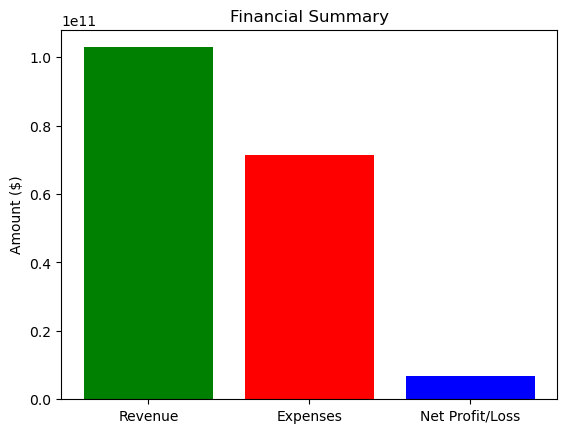

In [20]:
# 6. Financial Summary
revenue_total = df_all_years["total_revenue"].sum()
expenses_total = df_all_years["total_expenses"].sum()
net_profit_loss = df_all_years["net_profit_loss"].sum()

financials = [revenue_total, expenses_total, net_profit_loss]
labels = ["Revenue", "Expenses", "Net Profit/Loss"]

plt.bar(labels, financials, color=["green", "red", "blue"])
plt.title("Financial Summary")
plt.ylabel("Amount ($)")
plt.show()

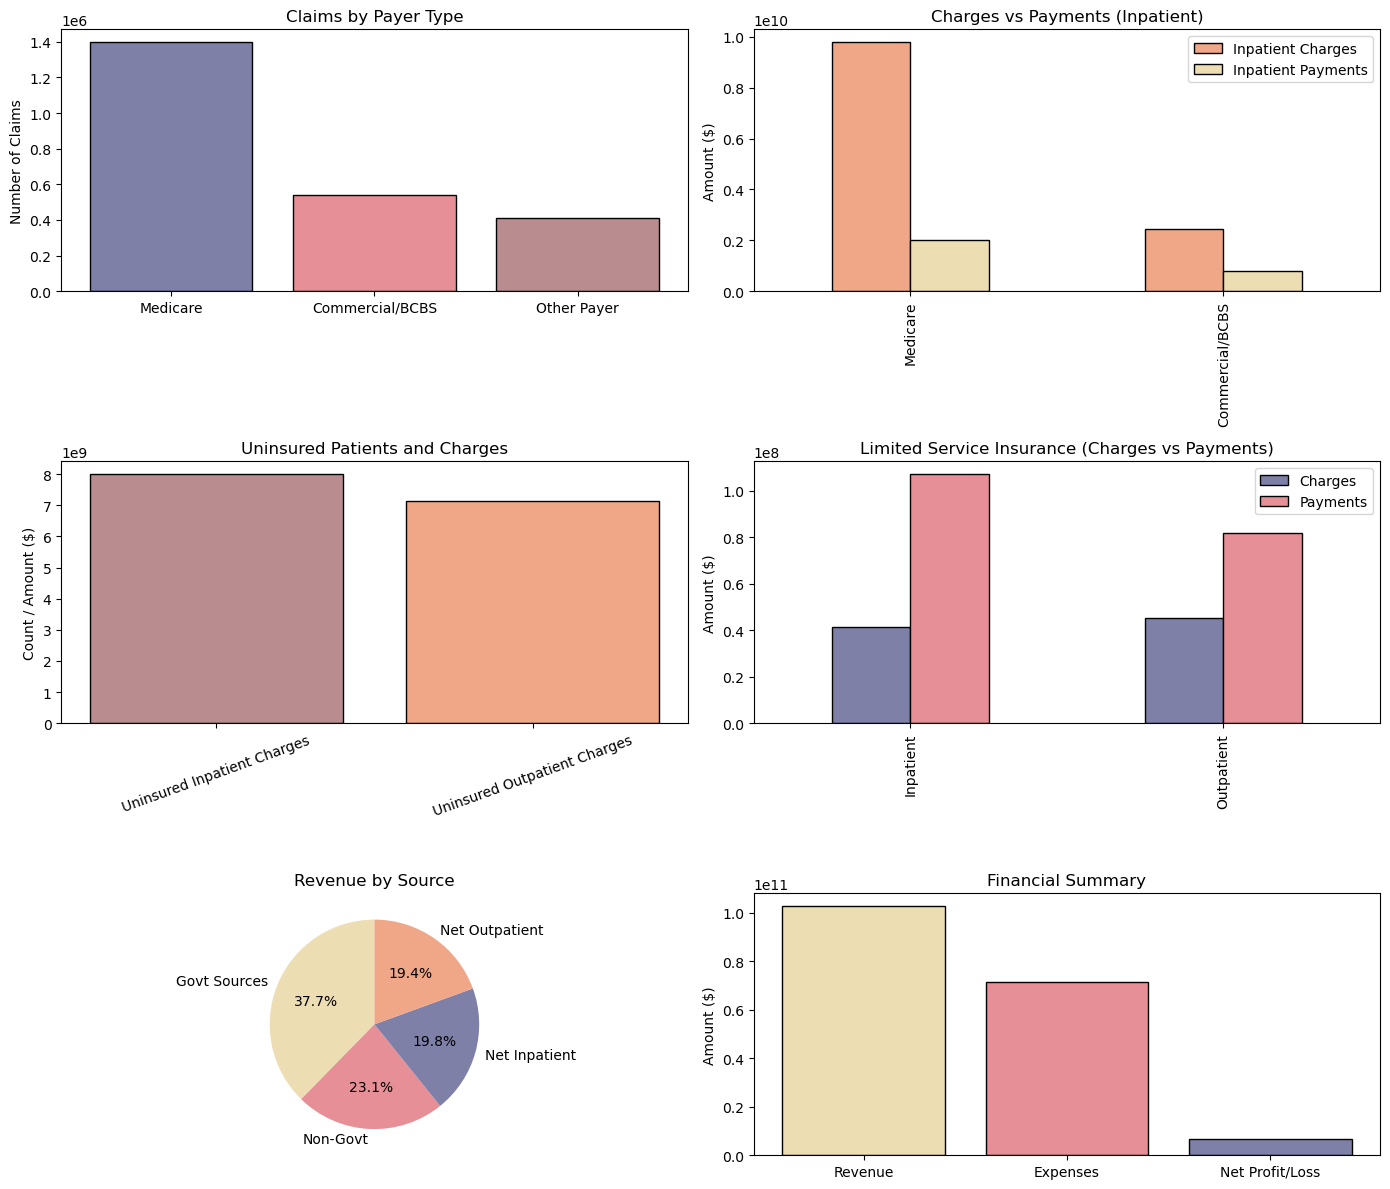

Saved to ../data/financial_summary.png


In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Create figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()  # flatten for easy indexing

# Custom color palette
colors = {
    "brown": "#B98C8F",
    "pink": "#E68F96",
    "yellow": "#EDDDB3",
    "orange": "#F0A787",
    "blue": "#7E80A8"
}

# -------------------------------
# 1. Claims by Payer Type
# -------------------------------
claims = {
    "Medicare": df_all_years["medicare_as_primary_num_of_claims"].sum(),
    "Commercial/BCBS": df_all_years["comm_bcbs_as_payer_num_of_claims"].sum(),
    "Other Payer": df_all_years["other_payer_as_primary_num_of_claims"].sum()
}
axes[0].bar(claims.keys(), claims.values(), 
            color=[colors["blue"], colors["pink"], colors["brown"]], edgecolor="black")
axes[0].set_title("Claims by Payer Type")
axes[0].set_ylabel("Number of Claims")

# -------------------------------
# 2. Charges vs Payments (Inpatient)
# -------------------------------
charges_payments = pd.DataFrame({
    "Inpatient Charges": [df_all_years["medicare_claims_inpatient_total_charges"].sum(),
                          df_all_years["comm_blue_cross_blue_shield_inpatient_total_charges"].sum()],
    "Inpatient Payments": [df_all_years["medicare_claims_inpatient_total_payment"].sum(),
                           df_all_years["comm_blue_cross_blue_shield_inpatient_total_payment"].sum()]
}, index=["Medicare", "Commercial/BCBS"])
charges_payments.plot(kind="bar", ax=axes[1], 
                      color=[colors["orange"], colors["yellow"]], edgecolor="black")
axes[1].set_title("Charges vs Payments (Inpatient)")
axes[1].set_ylabel("Amount ($)")

# -------------------------------
# 3. Uninsured Impact
# -------------------------------
uninsured = {
    "Uninsured Inpatient Charges": df_all_years["uninsured_inpatient_charges"].sum(),
    "Uninsured Outpatient Charges": df_all_years["uninsured_outpatient_charges"].sum()
}
axes[2].bar(uninsured.keys(), uninsured.values(), 
            color=[colors["brown"], colors["orange"]], edgecolor="black")
axes[2].set_title("Uninsured Patients and Charges")
axes[2].set_ylabel("Count / Amount ($)")
axes[2].tick_params(axis="x", rotation=20)

# -------------------------------
# 4. Limited Service Insurance
# -------------------------------
limited_service = pd.DataFrame({
    "Charges": [df_all_years["inpatient_charges_with_limited_service_insurance"].sum(),
                df_all_years["outpatient_charges_with_limited_service_insurance"].sum()],
    "Payments": [df_all_years["inpatient_total_payment_with_limited_service_insurance"].sum(),
                 df_all_years["outpatient_total_payment_with_limited_service_insurance"].sum()]
}, index=["Inpatient", "Outpatient"])
limited_service.plot(kind="bar", ax=axes[3], 
                     color=[colors["blue"], colors["pink"]], edgecolor="black")
axes[3].set_title("Limited Service Insurance (Charges vs Payments)")
axes[3].set_ylabel("Amount ($)")

# -------------------------------
# 5. Revenue by Source (Pie)
# -------------------------------
revenue = {
    "Govt Sources": df_all_years["total_govt_sources_net_patient_revenue"].sum(),
    "Non-Govt": df_all_years["total_non-govt_net_patient_revenue"].sum(),
    "Net Inpatient": df_all_years["total_net_inpatient_revenue"].sum(),
    "Net Outpatient": df_all_years["total_outpatient_net_patient_revenue"].sum()
}
axes[4].pie(revenue.values(), labels=revenue.keys(), 
            colors=[colors["yellow"], colors["pink"], colors["blue"], colors["orange"]],
            autopct="%1.1f%%", startangle=90)
axes[4].set_title("Revenue by Source")

# -------------------------------
# 6. Financial Summary
# -------------------------------
revenue_total = df_all_years["total_revenue"].sum()
expenses_total = df_all_years["total_expenses"].sum()
net_profit_loss = df_all_years["net_profit_loss"].sum()
financials = [revenue_total, expenses_total, net_profit_loss]
labels = ["Revenue", "Expenses", "Net Profit/Loss"]

axes[5].bar(labels, financials, 
            color=[colors["yellow"] if "yellow" in colors else "yellow", colors["pink"], colors["blue"]], 
            edgecolor="black")
axes[5].set_title("Financial Summary")
axes[5].set_ylabel("Amount ($)")

# Adjust layout
plt.tight_layout()

# Save to local file
file_path = "../data/financial_summary.png"
plt.savefig(file_path, dpi=300)
plt.show()

print(f"Saved to {file_path}")
